In [1]:
import kamping.parser.network as network
import kamping.parser.utils as utils
import networkx as nx

In [42]:
# graph  = network.KeggGraph('../data/kgml_hsa/hsa04910.xml', type='metabolite', protein_group_as_interaction=False)
graph  = network.KeggGraph('../data/kgml_hsa/hsa00010.xml', type='mixed', protein_group_as_interaction=True, multi_substrate_as_interaction=True)
graph2  = network.KeggGraph('../data/kgml_hsa/hsa00020.xml', type='mixed', protein_group_as_interaction=True, multi_substrate_as_interaction=True)
# sort by entry1 and entry2
#graph.interaction.sort_values(by=['entry1', 'entry2']).loc[(graph.interaction['entry2'] == '5160') | (graph.interaction['entry1'] == '5160' )]

In [43]:
print(graph2)

KEGG Pathway: 
            [Title]: Citrate cycle (TCA cycle) 
 
            [Name]: path:hsa00020 
 
            [Org]: hsa 
 
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00020 
 
            [Image]: https://www.kegg.jp/kegg/pathway/hsa/hsa00020.png 
 
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00020 
 
            Graph type: mixed 

            Number of Proteins: 30 

            Number of Compounds: 20 

            Protein ID type : kegg 

            Compound ID type : kegg 

            Number of Nodes: 50 
 
            Number of Edges: 189


In [32]:
len(graph.proteins)

67

In [45]:
from kamping.parser import convert
import h5py
import kamping.data.utils
# read protein embedding from h5
converter = convert.Converter(species='hsa', target='uniprot')
converter.convert(graph) 
converter.convert(graph2) 
protein_embedding = kamping.data.utils.get_uniprot_protein_embeddings([graph, graph2], '../data/embedding/protein_embedding.h5')
protein_embedding

{'P05062': array([ 0.02991137,  0.0627067 ,  0.03050329, ..., -0.03504322,
         0.00713267,  0.04461603], dtype=float32),
 'A0A024R3Y6': array([ 0.06211487,  0.0809937 ,  0.00740057, ..., -0.02249183,
         0.00876871,  0.0596795 ], dtype=float32),
 'O43837': array([0.04305183, 0.07670997, 0.03823907, ..., 0.02553398, 0.02834748,
        0.02302916], dtype=float32),
 'P06733': array([ 0.05542368,  0.08718207, -0.00400386, ..., -0.03992298,
         0.00308644,  0.03705578], dtype=float32),
 'P09467': array([ 0.06212753,  0.09245316,  0.0383652 , ..., -0.02632288,
         0.01742316,  0.00844542], dtype=float32),
 'P14550': array([ 0.02751152,  0.11284888,  0.02095443, ..., -0.08143989,
        -0.00694112, -0.01279399], dtype=float32),
 'Q9NUB1': array([ 0.04209898,  0.08139601,  0.03683288, ..., -0.04120598,
         0.02465762,  0.01696355], dtype=float32),
 'P00326': array([ 0.00597342,  0.10274789,  0.0348879 , ..., -0.01794898,
         0.03899954, -0.01563688], dtype=floa

In [46]:
# save protein embedding dict to h5
with h5py.File('../tests/data/hsa00010_protein_embeddings.h5', 'w') as h5file:
    for key, value in protein_embedding.items():
        h5file.create_dataset(key, data=value)

In [35]:
# graph.interaction.sort_values(by=['entry1', 'entry2']).loc[(graph.interaction['entry1'] == 'C00036')]

{'cpd:C00022': Text(983.0, 1294.0, 'cpd:C00022'),
 'cpd:C00068': Text(234.0, 1222.0, 'cpd:C00068'),
 'hsa:160287': Text(1074.0, 1222.0, 'hsa:160287'),
 'hsa:3939': Text(1169.0, 1078.0, 'hsa:3939'),
 'hsa:3945': Text(1275.0, 1078.0, 'hsa:3945'),
 'hsa:3948': Text(817.0, 1078.0, 'hsa:3948'),
 'hsa:5160': Text(179.0, 790.0, 'hsa:5160'),
 'hsa:5161': Text(94.0, 646.0, 'hsa:5161'),
 'hsa:5162': Text(394.0, 646.0, 'hsa:5162'),
 'hsa:92483': Text(1058.0, 1078.0, 'hsa:92483'),
 'cpd:C00024': Text(492.0, 934.0, 'cpd:C00024'),
 'cpd:C15973': Text(386.0, 1006.0, 'cpd:C15973'),
 'hsa:1737': Text(386.0, 1078.0, 'hsa:1737'),
 'cpd:C00033': Text(935.0, 1078.0, 'cpd:C00033'),
 'hsa:217': Text(1144.0, 1006.0, 'hsa:217'),
 'hsa:218': Text(1579.0, 862.0, 'hsa:218'),
 'hsa:219': Text(1676.0, 862.0, 'hsa:219'),
 'hsa:221': Text(1773.0, 862.0, 'hsa:221'),
 'hsa:222': Text(700.0, 862.0, 'hsa:222'),
 'hsa:223': Text(797.0, 862.0, 'hsa:223'),
 'hsa:224': Text(894.0, 862.0, 'hsa:224'),
 'hsa:501': Text(991.0, 8

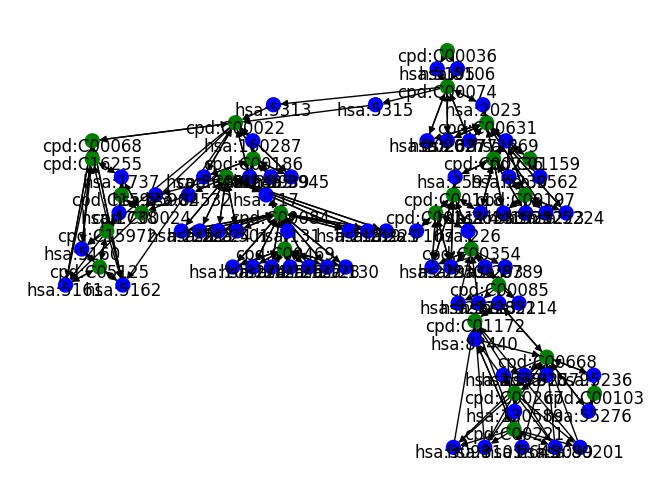

In [36]:
from matplotlib import pyplot as plt
graph_nx = graph.to_networkx()
color_map = {'compound': 'green', 'gene': 'blue'}

# Extract node types
node_types = nx.get_node_attributes(graph_nx, 'type')
node_colors = [color_map.get(node_types.get(node), 'gray') for node in graph_nx.nodes]
# set label positions offset y 

pos = nx.nx_agraph.graphviz_layout(graph_nx, prog='dot')  # positions for all nodes
label_pos = {node: (pos[0], pos[1]-20) for node, pos in pos.items()}
nx.draw(graph_nx, node_size=100, pos=pos, node_color=node_colors, with_labels=False)
nx.draw_networkx_labels(graph_nx, pos=label_pos, labels={node: node for node in graph_nx.nodes})

In [38]:
import kamping.data.utils
import kamping.parser.convert as convert
converter = convert.Converter(species='hsa', target='uniprot')
converter.convert(graph)

In [39]:
protein_embedding = kamping.data.utils.get_uniprot_protein_embeddings(graph, '../data/embedding/protein_embedding.h5')

In [25]:
metabolite_embedding = kamping.parser.utils.get_mol_embeddings(graph, transformer='morgan')

'
                    total 0 Invalid rows with "Unhandled" in the ROMol column


In [40]:
import kamping.data.utils
data = kamping.data.utils.convert_to_hetero_pyg(graph, protein_embeddings=protein_embedding,mol_embeddings=metabolite_embedding)

/Users/cgu3/Documents/experiments/KAMPING/kamping/data/convert.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hetero_data_dict[group][key] = torch.tensor(value)


In [41]:
data

HeteroData(
  compound={ x=[26, 1024] },
  gene={ x=[104, 1024] },
  (compound, to, compound)={
    type=[10],
    subtype_name=[10],
    subtype_value=[10],
    entry1_type=[10],
    entry2_type=[10],
    edge_index=[2, 10],
  },
  (compound, to, gene)={
    type=[209],
    subtype_name=[209],
    subtype_value=[209],
    entry1_type=[209],
    entry2_type=[209],
    edge_index=[2, 209],
  },
  (gene, to, compound)={
    type=[205],
    subtype_name=[205],
    subtype_value=[205],
    entry1_type=[205],
    entry2_type=[205],
    edge_index=[2, 205],
  }
)